# 03. rajpurohitpooja/Salary_Prediction_Portfolio

## Exploratory Data Analysis | Series 1 - train_features.csv & train_salaries.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('03_train_features.csv')
df_salary = pd.read_csv('03_train_salaries.csv')

In [3]:
# First 5 rows of the train dataset
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
# First 5 rows of the train salaries dataset
df_salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# Merge these two datasets with 'jobId' column; then show all the columns, counts and their data types
df = df.merge(df_salary, on='jobId')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [6]:
print("There are {} different company IDs".format(df['companyId'].nunique()))
print("\n#### 10 MOST FREQUENT COMPANY IDS ####")
print(df['companyId'].value_counts().head(10))
print("\n#### 10 LEAST FREQUENT COMPANY IDS ####")
print(df['companyId'].value_counts(ascending=True).head(10))

There are 63 different company IDs

#### 10 MOST FREQUENT COMPANY IDS ####
COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
COMP40    16008
COMP44    16005
COMP51    16005
COMP9     15988
COMP56    15979
Name: companyId, dtype: int64

#### 10 LEAST FREQUENT COMPANY IDS ####
COMP57    15635
COMP8     15638
COMP2     15641
COMP0     15666
COMP17    15715
COMP52    15737
COMP26    15750
COMP29    15754
COMP31    15756
COMP55    15767
Name: companyId, dtype: int64


In [7]:
print("There are {} different job types".format(df['jobType'].nunique()))
print("\n#### COUNTS OF JOB TYPES ####")
print(df['jobType'].value_counts())

There are 8 different job types

#### COUNTS OF JOB TYPES ####
SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64


In [8]:
print("There are {} different degrees".format(df['degree'].nunique()))
print("\n#### COUNTS OF DEGREES ####")
print(df['degree'].value_counts())

There are 5 different degrees

#### COUNTS OF DEGREES ####
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64


In [9]:
print("There are {} different majors".format(df['major'].nunique()))
print("\n#### COUNTS OF MAJORS ####")
print(df['major'].value_counts())

There are 9 different majors

#### COUNTS OF MAJORS ####
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64


In [10]:
print("There are {} different industries".format(df['industry'].nunique()))
print("\n#### COUNTS OF INDUSTRIES ####")
print(df['industry'].value_counts())

There are 7 different industries

#### COUNTS OF INDUSTRIES ####
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


In [11]:
# Get statistical info about numerical columns (yearsExperience, milesFromMetropolis, salary)
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


## Visualizations

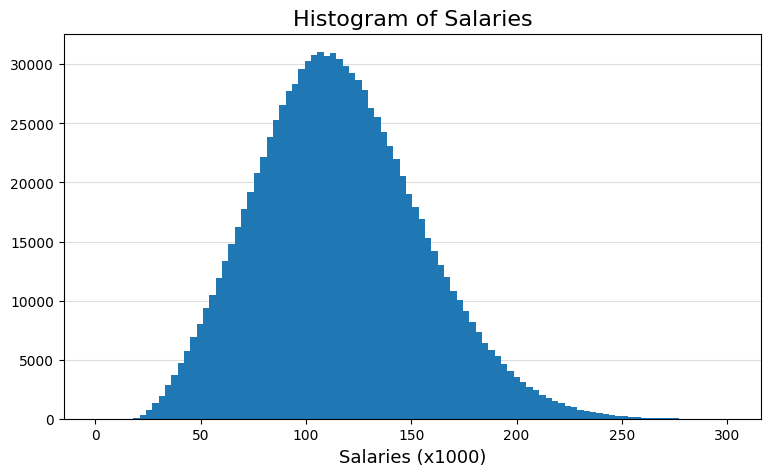

In [12]:
plt.figure(figsize=(9,5))
plt.hist(df['salary'], bins=100, histtype='bar', zorder=2)
plt.title("Histogram of Salaries", fontsize=16)
plt.xlabel('Salaries (x1000)', fontsize=13)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

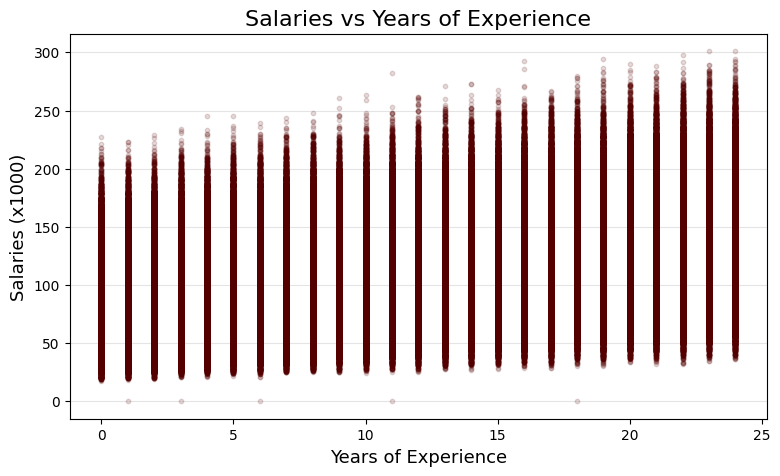

In [13]:
plt.figure(figsize=(9,5))
plt.scatter(df['yearsExperience'], df['salary'], alpha=0.15, s=10, color='#550000', zorder=2)
plt.title("Salaries vs Years of Experience", fontsize=16)
plt.xlabel("Years of Experience", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.grid(color='#e4e4e4', axis='y', zorder=1)
plt.show()

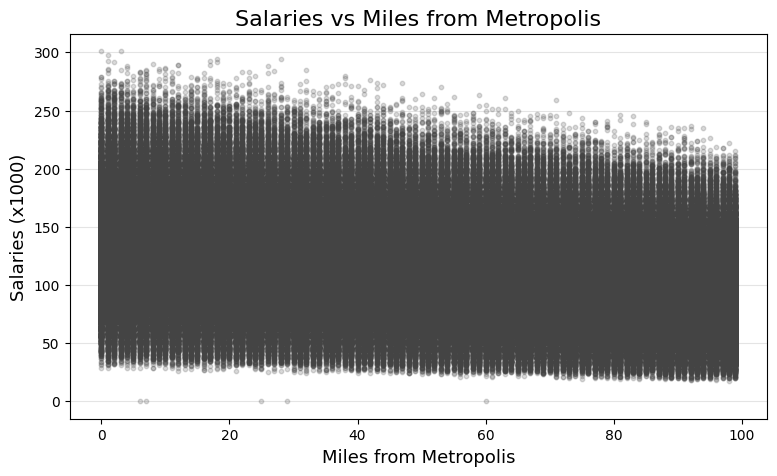

In [14]:
plt.figure(figsize=(9,5))
plt.scatter(df['milesFromMetropolis'], df['salary'], alpha=0.2, s=10, color='#444444', zorder=2)
plt.title("Salaries vs Miles from Metropolis", fontsize=16)
plt.xlabel("Miles from Metropolis", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.grid(color='#e4e4e4', axis='y', zorder=1)
plt.show()

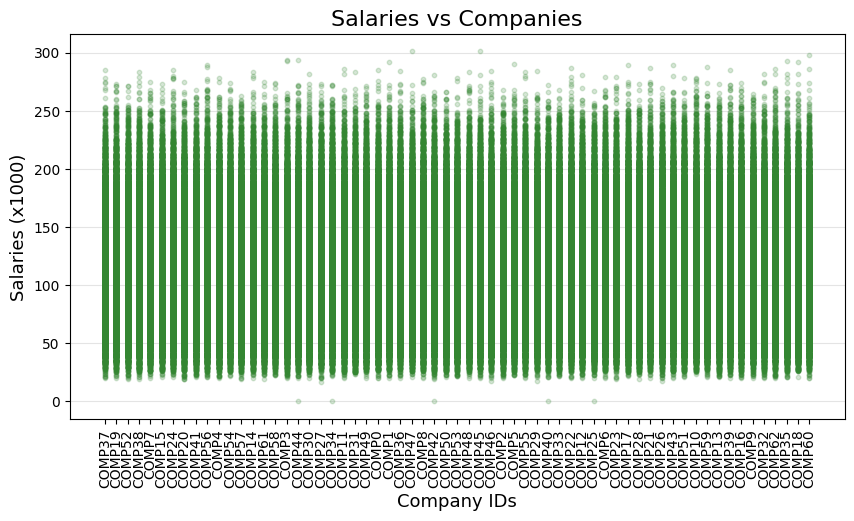

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df['companyId'], df['salary'], alpha=0.2, s=10, color='#348632', zorder=2)
plt.title("Salaries vs Companies", fontsize=16)
plt.xlabel("Company IDs", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.xticks(rotation=90)
plt.grid(color='#e4e4e4', axis='y', zorder=1)
plt.show()

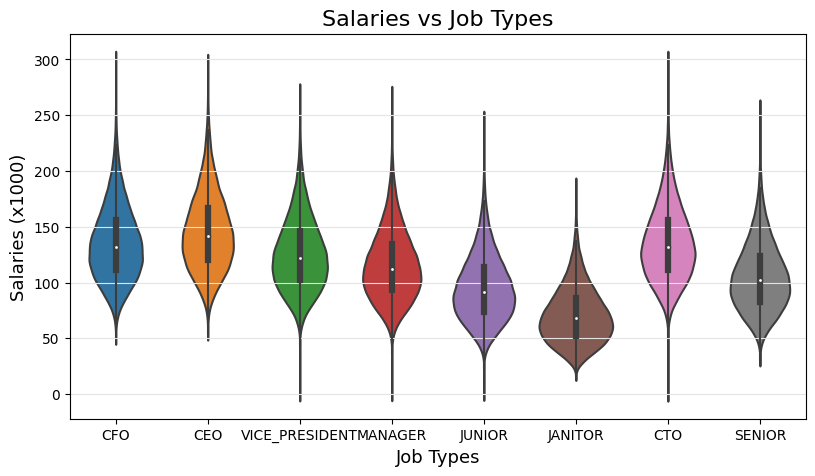

In [16]:
plt.figure(figsize=(9.5,5))
sns.violinplot(data=df, x='jobType', y='salary')
plt.title("Salaries vs Job Types", fontsize=16)
plt.xlabel("Job Types", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.grid(color='#e4e4e4', axis='y')
plt.show()

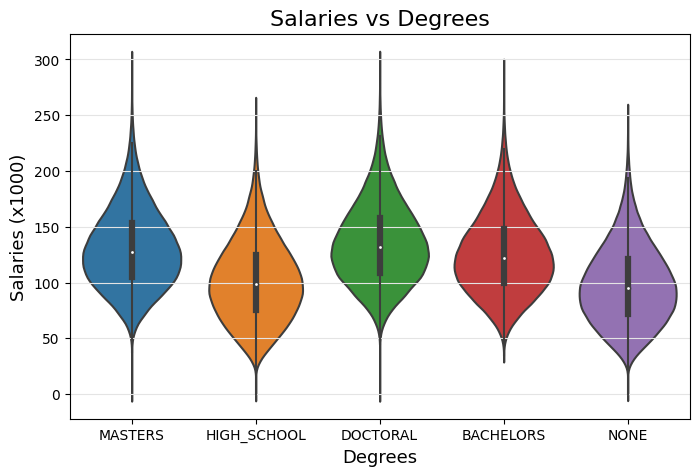

In [17]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='degree', y='salary')
plt.title("Salaries vs Degrees", fontsize=16)
plt.xlabel("Degrees", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.grid(color='#e4e4e4', axis='y')
plt.show()

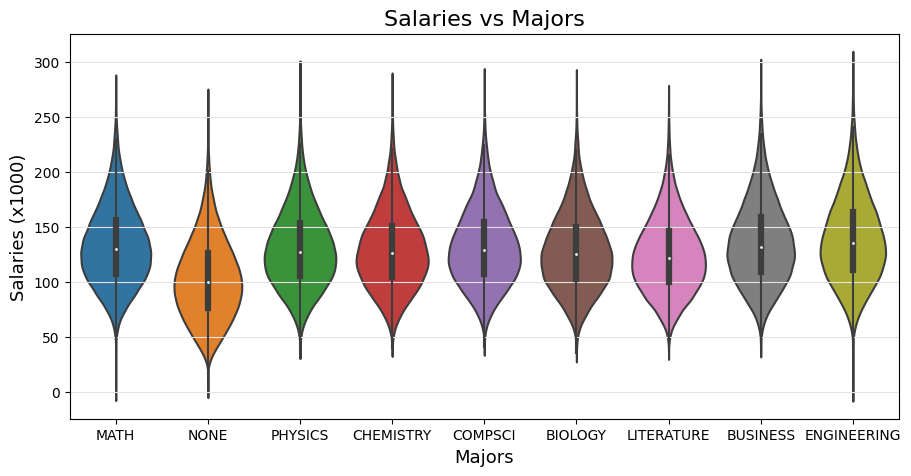

In [18]:
plt.figure(figsize=(10.7,5))
sns.violinplot(data=df, x='major', y='salary')
plt.title("Salaries vs Majors", fontsize=16)
plt.xlabel("Majors", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.grid(color='#e4e4e4', axis='y')
plt.show()

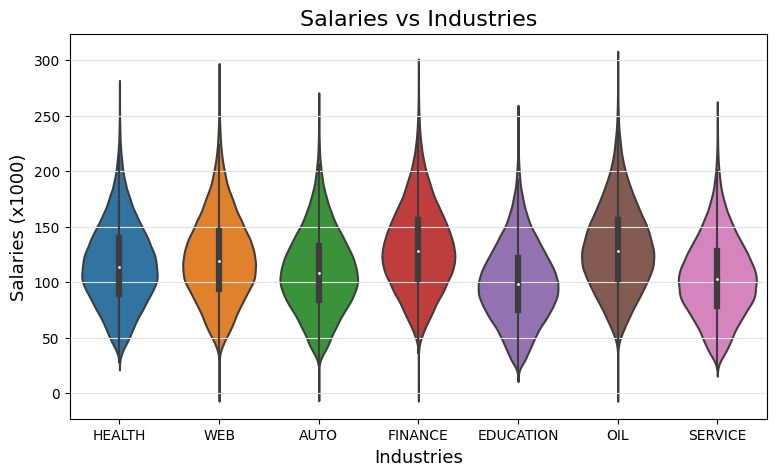

In [19]:
plt.figure(figsize=(9,5))
sns.violinplot(data=df, x='industry', y='salary')
plt.title("Salaries vs Industries", fontsize=16)
plt.xlabel("Industries", fontsize=13)
plt.ylabel("Salaries (x1000)", fontsize=13)
plt.grid(color='#e4e4e4', axis='y')
plt.show()